### Часть. Приоритизация гипотез.

In [1]:
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
import scipy.stats as st
import math
import warnings
register_matplotlib_converters()

In [2]:
data = pd.read_csv('/datasets/hypothesis.csv')

In [3]:
def total_info(data):
    print('Ознакомление с датафреймом')
    print('')
    
    
    display(data.head(10))
    print('Получены все 10 строк датафрейма')
    print('')
    
    size = 'Общее количество столбцов в датафрейме: {cols} Количество строк в датафрейме {rows}'
    size = size.format(cols = data.shape[1], rows = data.shape[0])
    print(size)
    print('')
    
    print(data.info())
    print('Получена основная информация о датафрейме')
    print('')
    
    print('Количество пропущенных в каждом столбце:')
    print(data.isna().sum())
    print('')
    
    duplicated = 'Количество полностью дублирующихся строк: {duplicate}, в процентах {percent}'
    duplicated = duplicated.format(duplicate = data.duplicated().sum(),\
                                   percent = int(data.duplicated().sum() / data.shape[0]))
    print(duplicated)

total_info(data)

Ознакомление с датафреймом



,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


Получены все 10 строк датафрейма

Общее количество столбцов в датафрейме: 5 Количество строк в датафрейме 9

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes
None
Получена основная информация о датафрейме

Количество пропущенных в каждом столбце:
Hypothesis    0
Reach         0
Impact        0
Confidence    0
Efforts       0
dtype: int64

Количество полностью дублирующихся строк: 0, в процентах 0


- Reach — скольких пользователей затронет изменение, которое вы хотите внести;
- Impact — насколько сильно изменение повлияет на пользователей, их опыт и удовлетворение от продукта;
- Confidence — насколько вы уверены, что это изменение повлияет на пользователей именно так; 
- Efforts — сколько стоит протестировать эту гипотезу. 

#### Примените фреймворк ICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.

In [4]:
data['ICE'] = (data['Impact'] * data['Confidence']) / data['Efforts']

In [5]:
pd.options.display.max_colwidth = 155
display(data.sort_values(by = 'ICE', ascending = False)[['Hypothesis','ICE']])

,Hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.200000
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.333333
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.200000
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.000000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.000000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.000000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.333333
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.125000
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.000000


По оценке ICE **8,0,7** гипотезы обладают наивысшим приоритетом за счет высоких баллов по Impact и Confidence.

#### Примените фреймворк RICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.

In [6]:
data['RICE'] = (data['Impact'] * data['Confidence'] * data['Reach']) / data['Efforts']

In [7]:
pd.options.display.max_colwidth = 155
display(data.sort_values(by = 'RICE', ascending = False)[['Hypothesis','RICE']])

,Hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


- По оценке RICE **7** гипотеза обладает наивысшим приоритетом за счет максимального показателя Reach
- Ниже по приоритету идет **2** гипотеза за счет высокого Reach и низкого Efforts
- Далее по приоритету находятся гипотезы под номерами 0 и 6, которые набрали по 40.0 баллов за счет невысокой стоимости проведенния теста(у **6** гипотезы) и за счет высокого показателя Impact(гипотеза **0**)

#### Укажите, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясните, почему так произошло.

- Чем финансово затратнее проведение теста - тем ниже его приоритет (показатель Efforts) в обеих фреймворках
- При оценке про фреймворку RICE есть дополнительный параметр Reach, чем он выше, тем выше будет приоритет гипотезы
- При системе оценивания ICE индикатор Reach не используется

### Часть. Анализ A/B-теста

In [8]:
orders = pd.read_csv('/datasets/orders.csv')
visitors = pd.read_csv('/datasets/visitors.csv')

In [9]:
total_info(orders)

Ознакомление с датафреймом



,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
5,182168103,935554773,2019-08-15,2210,B
6,398296753,2900797465,2019-08-15,1860,B
7,2626614568,78758296,2019-08-15,1044,A
8,1576988021,295230930,2019-08-15,13710,A
9,1506739906,1882260405,2019-08-15,1855,B


Получены все 10 строк датафрейма

Общее количество столбцов в датафрейме: 5 Количество строк в датафрейме 1197

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB
None
Получена основная информация о датафрейме

Количество пропущенных в каждом столбце:
transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64

Количество полностью дублирующихся строк: 0, в процентах 0


In [10]:
orders['date'] = orders['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

In [11]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   int64         
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


**Предобработка данных датафрейма orders:**
- Названия не соотвествуют змеиному регистру, однако для простоты работы оставляю их без изменений
- Типы данных всех столбцов,кроме date, соответствуют значениям, заложенным в них. Столбец date приведен к типу datetime64 
- Пропуски отсутствуют
- Дубликаты отсутствуют

In [12]:
total_info(visitors)

Ознакомление с датафреймом



,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
5,2019-08-06,A,667
6,2019-08-07,A,644
7,2019-08-08,A,610
8,2019-08-09,A,617
9,2019-08-10,A,406


Получены все 10 строк датафрейма

Общее количество столбцов в датафрейме: 3 Количество строк в датафрейме 62

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB
None
Получена основная информация о датафрейме

Количество пропущенных в каждом столбце:
date        0
group       0
visitors    0
dtype: int64

Количество полностью дублирующихся строк: 0, в процентах 0


In [13]:
visitors['date'] = visitors['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

In [14]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


**Предобработка данных датафрейма visitors:**
- Названия столбцов соответствуют змеиному регистру
- Типы данных всех столбцов соответствуют значениям, заложенным в них. Столбец date приведен к типу datetime64 
- Пропуски отсутствуют
- Дубликаты отсутствуют

In [15]:
double_group_users = np.intersect1d(orders[orders['group'] == 'A']['visitorId'].unique(), \
                                    orders[orders['group'] == 'B']['visitorId'].unique())
print('Количество пользователей вошедших в обе группы -', len(double_group_users))

Количество пользователей вошедших в обе группы - 58


In [16]:
orders = orders[np.logical_not(orders['visitorId'].isin(double_group_users))]

58 Пользователей оказались в обеих группах. Это составляет 4.8%  общего количества данных. В результате теста эти данные могут исказить результаты, поэтому принято решения удалить из датафрейма дублирующихся в обеих группах пользователей

#### Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения.

In [17]:
# массив уникальных пар значений дат и групп теста
datesGroups = orders[['date','group']].drop_duplicates()
datesGroups.head()

,date,group
0,2019-08-15,B
7,2019-08-15,A
45,2019-08-16,A
47,2019-08-16,B
55,2019-08-01,A


In [18]:
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and \
   (orders['date'] <= x['date'], orders['group'] == x['group'])]\
    .agg({'date' : 'max', 'group' : 'max', 'transactionId' : 'nunique','visitorId' : 'nunique', 'revenue' : 'sum'}), axis=1) \
    .sort_values(by=['date','group'])
ordersAggregated.head()

,date,group,transactionId,visitorId,revenue
55,2019-08-01,A,23,19,142779
66,2019-08-01,B,17,17,59758
175,2019-08-02,A,42,36,234381
173,2019-08-02,B,40,39,221801
291,2019-08-03,A,66,60,346854


In [19]:
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and\
                    (visitors['date'] <= x['date'], visitors['group'] == x['group'])]\
                    .agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1)\
                    .sort_values(by=['date','group'])
visitorsAggregated.head()

,date,group,visitors
55,2019-08-01,A,719
66,2019-08-01,B,713
175,2019-08-02,A,1338
173,2019-08-02,B,1294
291,2019-08-03,A,1845


In [20]:
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on = ['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

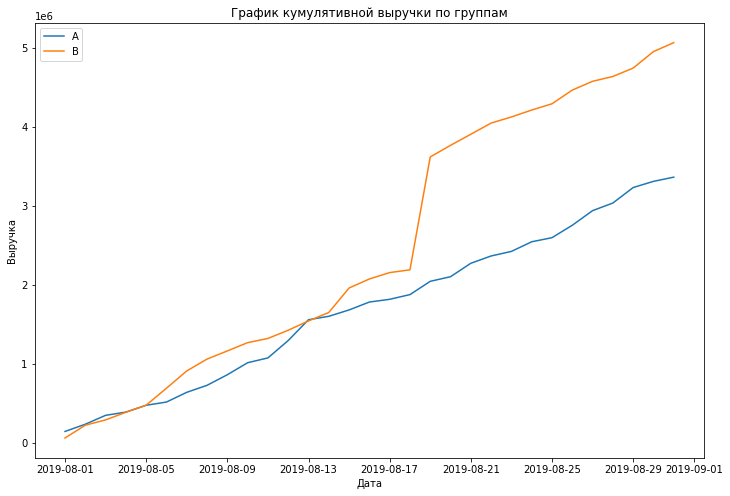

In [21]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]
plt.figure(figsize=(12, 8))
# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.xlabel('Дата')
plt.ylabel('Выручка')
plt.title('График кумулятивной выручки по группам')
plt.legend()
plt.show()

- 2019-08-13 Значения выручки групп А и B были одинаковыми, после этого момента сегмент В лидировал весь период до конца теста 
- 2019-08-17 Резкий скачок выручки и группы B


#### Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения.

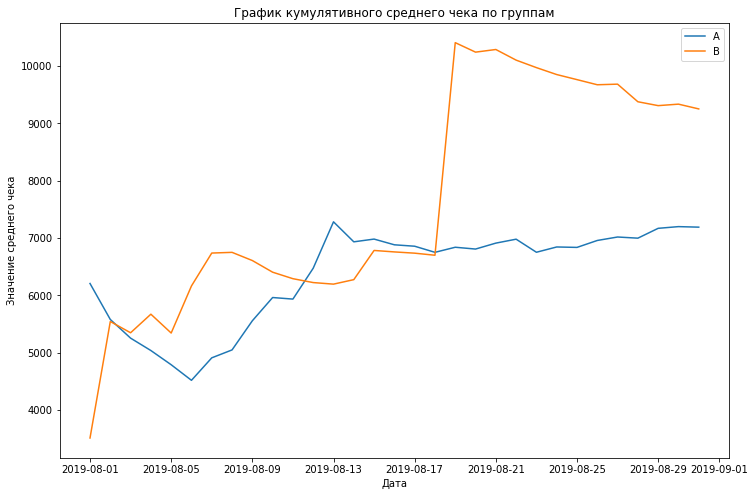

In [22]:
visitorsAggregated = datesGroups.apply(
    lambda x: visitors[
        np.logical_and(
            visitors['date'] <= x['date'], visitors['group'] == x['group']
        )
    ].agg({'date': 'max', 'group': 'max', 'visitors': 'sum'}),
    axis=1,
).sort_values(by=['date', 'group'])

cumulativeData = ordersAggregated.merge(
    visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group']
)
cumulativeData.columns = [
    'date',
    'group',
    'orders',
    'buyers',
    'revenue',
    'visitors',
]

cumulativeRevenueA = cumulativeData[cumulativeData['group'] == 'A'][
    ['date', 'revenue', 'orders']
]
cumulativeRevenueB = cumulativeData[cumulativeData['group'] == 'B'][
    ['date', 'revenue', 'orders']
]
plt.figure(figsize=(12, 8))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.xlabel('Дата')
plt.ylabel('Значение среднего чека')
plt.title('График кумулятивного среднего чека по группам')
plt.legend() 
plt.show()

- 17 августа в группе B был совершен очень крупный заказ,который, возможно, является выбросом и искажает данные
- Кумулятивное значение среднего чека по времени колеблется. Скорее всего, принимать решение по этой метрике рано. Или требуется дополнительный анализ выбросов, которые так сильно искажают результаты.

#### Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.

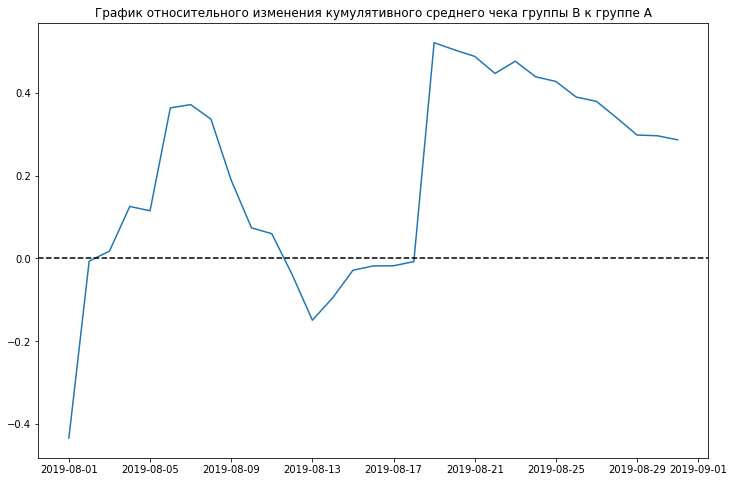

In [23]:
cumulativeData = ordersAggregated.merge(
    visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group']
)
cumulativeData.columns = [
    'date',
    'group',
    'orders',
    'buyers',
    'revenue',
    'visitors',
]

cumulativeRevenueA = cumulativeData[cumulativeData['group'] == 'A'][
    ['date', 'revenue', 'orders']
]
cumulativeRevenueB = cumulativeData[cumulativeData['group'] == 'B'][
    ['date', 'revenue', 'orders']
]
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
plt.figure(figsize=(12, 8))
# cтроим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--') 

plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A')
plt.show()

Результаты теста значительно и резко менялись В период с 5 по 17 августа. Видимо, именно тогда были совершены аномальные заказы.

#### Постройте график кумулятивного среднего количества заказов на посетителя по группам. Сделайте выводы и предположения.

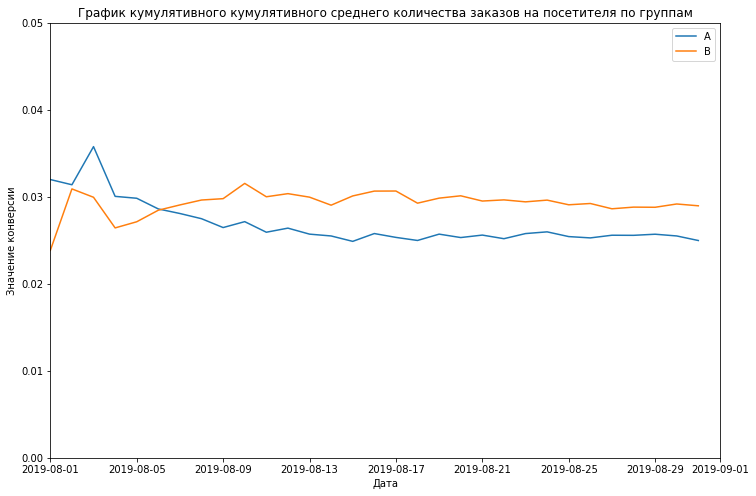

In [24]:

# считаем среднее количество заказов на посетителя
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']
plt.figure(figsize=(12, 8))
# строим графики
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()

# задаем масштаб осей

plt.axis([dt.datetime(2019, 8, 1), dt.datetime(2019, 9, 1), 0, 0.05])
plt.xlabel('Дата')
plt.ylabel('Значение конверсии')
plt.title('График кумулятивного кумулятивного среднего количества заказов на посетителя по группам')
plt.show()

- Абсолютное значение колебания в начале и в конце теста не слишком большое: от 2.5% до 3.5%
- Конверсия на протяжении всего эксперимента выше у группы B 
- 5 августа перекрест,после которого конверия по количеству заказов у группы B становится выше

#### Постройте график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. Сделайте выводы и предположения.

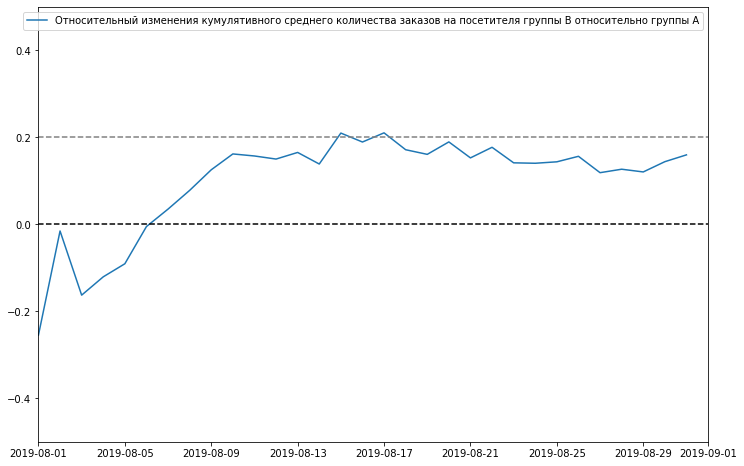

In [25]:

cumulativeDataA = cumulativeData[cumulativeData['group'] == 'A']
cumulativeDataB = cumulativeData[cumulativeData['group'] == 'B']

mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
plt.figure(figsize=(12, 8))
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Относительный изменения кумулятивного среднего количества заказов на посетителя группы B относительно группы A")
plt.legend()

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.2, color='grey', linestyle='--')
plt.axis(['2019-08-01', '2019-09-01', -0.5, 0.5])
plt.show()

Почти с самого начала теста группа B лидирует по метрике: становится лучше и лучше,фиксируется около прироста в 10-20% относительно группы A.

#### Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения.

        user_id  orders
908  3967698036       3
55    249864742       3
478  2108163459       3
687  2988190573       3
890  3908431265       3
138   611059232       3
632  2742574263       3
157   678354126       2
323  1404560065       2
452  1985475298       2


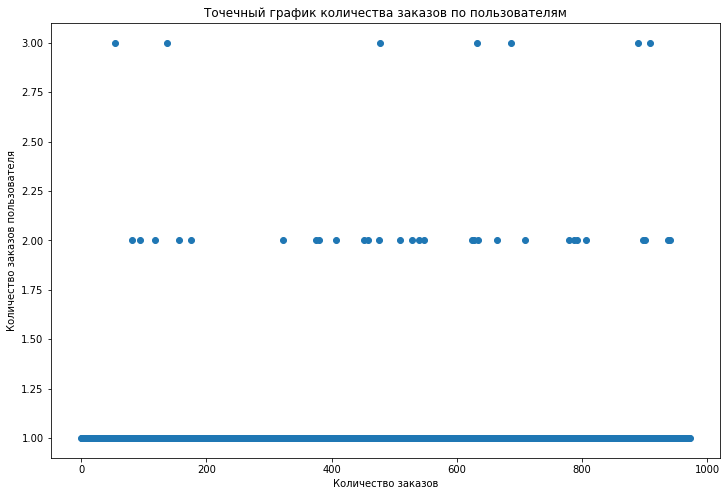

In [26]:
ordersByUsers = orders.drop(['group', 'revenue', 'date'], axis=1).groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsers.columns = ['user_id','orders']

print(ordersByUsers.sort_values(by='orders',ascending=False).head(10))
plt.figure(figsize=(12, 8))
x_values = pd.Series(range(0,len(ordersByUsers)))
plt.scatter(x_values, ordersByUsers['orders']);
plt.xlabel('Количество заказов')
plt.ylabel('Количество заказов пользователя')
plt.title('Точечный график количества заказов по пользователям')
plt.show()

- Наибольшее количество пользователей с 1 заказом
- Встречается достаточное количество пользователей с 2 заказами
- Более 2 заказов совершило относительно небольшое количетсво пользователей
- Необходимо вычислить, какие показатели являются выбросами

#### Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.

In [27]:
display(ordersByUsers.sort_values(by='orders', ascending=False).head(10))

print(np.percentile(ordersByUsers['orders'], [95, 99]))

,user_id,orders
908,3967698036,3
55,249864742,3
478,2108163459,3
687,2988190573,3
890,3908431265,3
138,611059232,3
632,2742574263,3
157,678354126,2
323,1404560065,2
452,1985475298,2


[1. 2.]


- 95% пользователей сделали 1 заказ - это верхняя граница нормальных значений, больше 2 заказов - аномалии
- не более 1% совершили 2 и более заказов

#### Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.

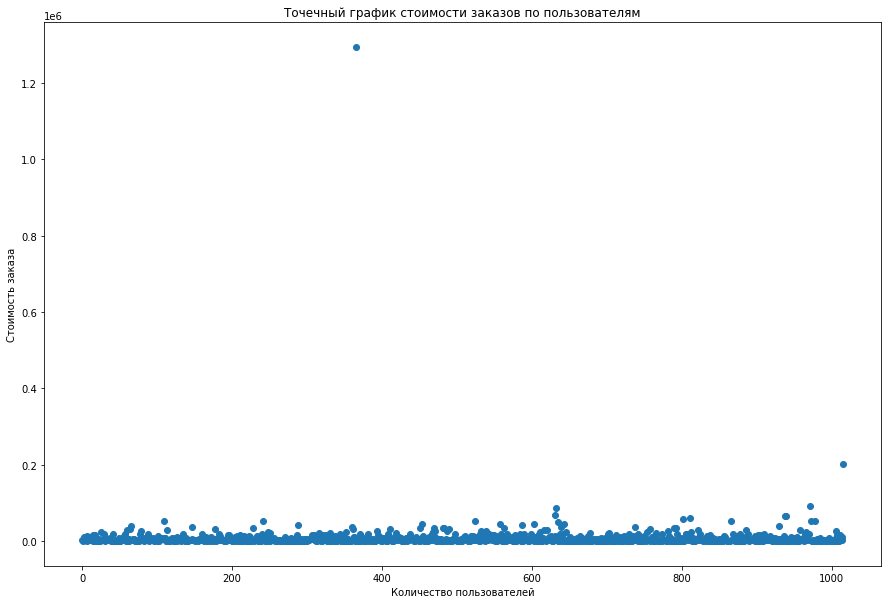

In [28]:
ordersByUsers = orders.groupby('visitorId', as_index=False).agg({'revenue' : 'sum'}).sort_values(by='revenue',ascending=False)
ordersByUsers.columns = ['userId', 'revenue']
x_values = pd.Series(range(0, len(orders)))

plt.figure(figsize=(15, 10))

plt.title('Суммы заказов')

plt.scatter(x_values, orders['revenue'])

plt.xlabel('Количество пользователей')
plt.ylabel('Стоимость заказа')
plt.title('Точечный график стоимости заказов по пользователям')
plt.show()

- Виден заказ, сумма которого составляет более 1.3 и заказ стоимость которого 0.2
- Основное количетсво заказов  лежит в границе до  0.1

#### Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.

In [29]:
display(orders.sort_values(by='revenue', ascending=False).head(10))
print(np.percentile(orders['revenue'], [95, 99]))

,transactionId,visitorId,date,revenue,group
425,590470918,1920142716,2019-08-19,1294500,B
1196,3936777065,2108080724,2019-08-15,202740,B
1136,666610489,1307669133,2019-08-13,92550,A
744,3668308183,888512513,2019-08-27,86620,B
743,3603576309,4133034833,2019-08-09,67990,A
1103,1348774318,1164614297,2019-08-12,66350,A
1099,316924019,148427295,2019-08-12,65710,A
949,1347999392,887908475,2019-08-21,60450,A
940,2420050534,4003628586,2019-08-08,58550,B
131,3163614039,2254586615,2019-08-22,53904,A


[26785. 53904.]


- не более 5% совершили покупок на сумму более 26785 - данную стоимость можно считать верхней границей для нормальных заказол. Показатель выше - аномальный
- не более 1% совершили заказ на сумму более 53904



#### Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. Сделайте выводы и предположения.

- H0: Нет статистически значимых различий в конверсии по среднему количеству заказов в группе A и B
- H1: Есть статистически значимые отличия в конверсии по среднему количеству заказов между группами А и В


In [30]:
conversion = (orders.groupby('group').agg({'transactionId':'count'}).rename(columns={'transactionId':'orders'}))\
                                     .join((visitors.groupby('group').agg({'visitors':'sum'}))).reset_index()
conversion['conversion'] = conversion['orders'] / conversion['visitors']
display(conversion)

,group,orders,visitors,conversion
0,A,468,18736,0.024979
1,B,548,18916,0.028970


In [31]:
alpha=0.05
purchases = np.array(conversion['orders'])
leads = np.array(conversion['visitors'])
p1 = purchases[0] / leads[0]
p2 = purchases[1] / leads[1]
combined = (purchases[0] + purchases[1]) / (leads[0] + leads[1])
difference = p1-p2
z_value = difference / math.sqrt(combined * (1 - combined) * (1 / leads[0] + 1 / leads[1]))
distr = st.norm(0,1)
p_value = (1 - distr.cdf(abs(z_value))) * 2
print('P-value: ', p_value)
if (p_value < alpha):
    print("Отвергаем нулевую гипотезу, различия между группами статистически значимы")
else:
    print("Не получилось отвергнуть нулевую гипотезу, нет статистических значимых различий")

print('')
#Относительное различие конверсий
print('Относительная разница конверсий группы В к группе А: ','{0:.3f}'.format(p2/p1-1))

P-value:  0.016851380434703023
Отвергаем нулевую гипотезу, различия между группами статистически значимы

Относительная разница конверсий группы В к группе А:  0.160


In [32]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders']

In [33]:
sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

print("P-value {0:.5f}".format(st.mannwhitneyu(sampleA, sampleB)[1]))
print("Относительная разница между группой B и А: {0:.3f}".format((data['ordersPerDateB'].sum()/data['visitorsPerDateB'].sum())/(data['ordersPerDateA'].sum()/data['visitorsPerDateA'].sum())-1))

P-value 0.01102
Относительная разница между группой B и А: 0.160


- P-value меньше 0.05 - между группами есть статистически значимые различия. Отвергаем нулевую гипотезу
- Разница в среднем количестве заказов 16%

#### Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.

- H0: Нет статистически значимых различий в конверсии по среднему чеку в группе A и B
- H1: Есть статистически значимые отличия в конверсии по среднему чеку между группами А и В


    


In [34]:
alpha = 0.05
results = st.mannwhitneyu(orders[orders['group'] == 'A']['revenue'], orders[orders['group'] == 'B']['revenue'])
pvalue = results.pvalue
print('P-value: ', pvalue)
if (pvalue < alpha):
    print("Отвергаем H0: разница статистически значима")
else:
    print("Не получилось отвергнуть нулевую гипотезу,  нет статистической значимости различий между группами")

P-value:  0.8294908998149533
Не получилось отвергнуть нулевую гипотезу,  нет статистической значимости различий между группами


P-value больше 0.05, статистических значимых различий нет. Не получилось отвергнуть нулевую гипотезу.


#### Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. Сделайте выводы и предположения.

**Освобождаем данные от значений, выходящих за 95 процентиль:**
- пользователи, которые сделали более 2х заказов
- пользователи, сумма заказов которых составила более 26785 

    
    - H0: Нет статистически значимых различий в конверсии по количеству заказов по 'очищенным данным' в группе A и B
    - H1: Есть статистически значимые отличия в конверсии по количеству заказов по 'очищенным данным' между группами А и В





In [35]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 2]['userId'],
        ordersByUsersB[ordersByUsersB['orders'] > 2]['userId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > 26785]['visitorId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)

In [36]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)
print('{0:.5f}'.format(st.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 

0.01235
0.182


P-value меньше 0.05,различия между группами являются статистически значимыми и составляют 18.2%, отвергаем нулевую гипотезу

#### Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.

- H0: По очищенным данным нет статистически значимых различий между средним чеком группы В и А нет.
- H1: По очищенным данным есть статистически значимые различия между средним чеком группы В и А.


In [37]:
print("p-value после очистки данных: {0:.3f}".format(st.mannwhitneyu(
    orders[np.logical_and(orders['group']=='A', np.logical_not(
    orders['visitorId'].isin(abnormalUsers)))]['revenue'], orders[np.logical_and(
    orders['group']=='B', np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'])[1]))

print("Относительное изменение среднего чека в группе B по отношению группы A после очистки данных: {0:.3f}".format(
    orders[np.logical_and(orders['group']=='B',np.logical_not(
    orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean()/orders[np.logical_and(
    orders['group']=='A', np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean() - 1)) 

p-value после очистки данных: 0.646
Относительное изменение среднего чека в группе B по отношению группы A после очистки данных: -0.048


- P-value 0.6 показывает, что нет статистически значимых различий между средним чеком группы В и А. Не отвергаем нулевую гипотезу
- После очистки данных относительная разница между средними чеками обеих групп составляет -4.8% Эта разница не является статистически значимой


#### Примите решение по результатам теста и объясните его. Варианты решений:
1. Остановить тест, зафиксировать победу одной из групп.
2. Остановить тест, зафиксировать отсутствие различий между группами.
3. Продолжить тест.

По результату исследования можно сделать неоднозначные выводы:

- По графику кумулятивной выручки группа B превосходит группу А
- По графику кумулятивного среднего чека показатели группы B лучше,однако из-за резких колебаний можно говорить о выбросах в группе B
- По графику относительного изменения кумулятивного среднего чека группа B практически на протяжении всего эксперимента показывала лучшие результаты
- По графику кумулятивного среднего количества заказов на посетителя по группам группа В показывает лучший результат, чем А
- По график относительного изменения кумулятивного среднего количества заказов на посетителя группа В выдает лучшие показатели, чем группа А
- По точечным графиками стоимости и количества заказов и определения 95 и 99 перцентилей, значения, которые выходят за 95 перцентиль признаны аномальными (количество заказов более 2 заказов и стоимость более 32899)
- При оценке сырых данных различия в конверсии между группами имеет статистическую значимость, так же как и при очищенных данных
- Статистическая значимость при исследовании 'сырых'(разница в средних чеках между группой В и А -2.5%) и 'очищенных'(разница в средних чеках между группой В и А -4.8%) данных по среднему чеку между группами отсутствует (полученые различия не являются статистически значимыми). Группы А и В статистически не отличаются.
- При оценке статистической значимости 'сырых данных', как и после 'очистки данных от выбросов' разница между средним количетсвом заказов по группам статистически значима(16% и 18% соответственно)

Тест продолжать не следует, так как группа B превосходит группу A (очистка данных от выбросов так же подтвердает эту гипотезу)